In [23]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from numpy import sin, pi, cos, log

In [24]:
class Data(Dataset):
    ## constructor
    def __init__(self, points = 128):
        self.x = torch.zeros ((points, 1))
        self.y = torch.zeros ((points, 1))
        a = np.arange (0, 2*pi, pi/(points/2))
        for i in range (points):
            self.x[i] = a[i]
            self.y[i] = sin(self.x[i])**2 
        # self.step = pi/(points/2)
        # self.X = np.arange(self.step, 2*pi+ self.step, self.step)
        # self.Y = np.square (sin(self.X))
        # self.y = torch.from_numpy(self.Y)
        # self.x = torch.from_numpy(self.X)
        self.len = self.y.shape[0]

    ## getter
    ## todo, 
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    ## get length
    def __len__ (self):
        return self.len

    ##plot the diagram
    def plot_diagram (self):
        plt.plot(self.x, self.y)
        plt.xlabel("$//theta$")
        plt.ylabel("$f$")
        plt.show()

In [25]:
class Net(nn.Module):
    
    ## define the model and the dimension of parameters for each layers
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))


    def forward (self, activation): 
        L = len (self.hidden)
        for (l, linear_transform) in zip(range (L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = F.sigmoid(linear_transform(activation))
        return activation

In [26]:
def train(data_set, model, criterion, train_loader, optimizer, epochs = 100):

    Loss = []
    for epochs in range (epochs):
        for x, y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad ()
            loss.backward()
            optimizer.step()
            Loss.append(loss.item())
    return Loss



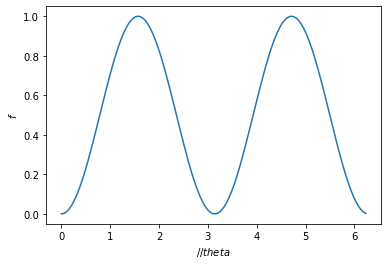

In [27]:
data_set = Data(128)
data_set.plot_diagram()

In [28]:
train_loader = DataLoader(dataset=data_set)
for x, y in train_loader:
    print (x, y)


tensor([[0.]]) tensor([[0.]])
tensor([[0.0491]]) tensor([[0.0024]])
tensor([[0.0982]]) tensor([[0.0096]])
tensor([[0.1473]]) tensor([[0.0215]])
tensor([[0.1963]]) tensor([[0.0381]])
tensor([[0.2454]]) tensor([[0.0590]])
tensor([[0.2945]]) tensor([[0.0843]])
tensor([[0.3436]]) tensor([[0.1135]])
tensor([[0.3927]]) tensor([[0.1464]])
tensor([[0.4418]]) tensor([[0.1828]])
tensor([[0.4909]]) tensor([[0.2222]])
tensor([[0.5400]]) tensor([[0.2643]])
tensor([[0.5890]]) tensor([[0.3087]])
tensor([[0.6381]]) tensor([[0.3549]])
tensor([[0.6872]]) tensor([[0.4025]])
tensor([[0.7363]]) tensor([[0.4510]])
tensor([[0.7854]]) tensor([[0.5000]])
tensor([[0.8345]]) tensor([[0.5490]])
tensor([[0.8836]]) tensor([[0.5975]])
tensor([[0.9327]]) tensor([[0.6451]])
tensor([[0.9817]]) tensor([[0.6913]])
tensor([[1.0308]]) tensor([[0.7357]])
tensor([[1.0799]]) tensor([[0.7778]])
tensor([[1.1290]]) tensor([[0.8172]])
tensor([[1.1781]]) tensor([[0.8536]])
tensor([[1.2272]]) tensor([[0.8865]])
tensor([[1.2763]]) t

In [30]:
Layers = [1, 16, 1]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set)
criterion = nn.MSELoss()
Loss = train(data_set, model, criterion, train_loader, optimizer, epochs=100)


